In [2]:
import yfinance as yf
import riskfolio as rp
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")


start = "2019-01-01"
end = "2022-01-01"

asset_classes = pd.read_csv("asset_classes.csv").sort_values(by = ["Assets"])
asset_classes = asset_classes.sort_values(by=['Assets'])

assets = list(asset_classes["Assets"])


data = yf.download(assets, start = start, end = end)

[*********************100%***********************]  7 of 7 completed


In [3]:
constraints = pd.read_csv("constraints.csv")
constraints

,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,Classes,Class 1,Crypto,<=,0.050,NaN,NaN,NaN,NaN
1,False,Each asset in a class,Class 1,Crypto,<=,0.025,NaN,NaN,NaN,NaN


In [4]:
returns = data["Adj Close"].pct_change().dropna()

# Variables

In [5]:
method_mu = 'hist'
method_cov = 'hist'
hist = True
model = 'Classic'
rm = 'MDD'
obj = 'Sharpe'
rf = 0
l  = 0

"""
’MV’: Standard Deviation.
’MAD’: Mean Absolute Deviation.
’MSV’: Semi Standard Deviation.
’FLPM’: First Lower Partial Moment (Omega Ratio).
’SLPM’: Second Lower Partial Moment (Sortino Ratio).
’CVaR’: Conditional Value at Risk.
’EVaR’: Entropic Value at Risk.
’WR’: Worst Realization (Minimax)
’MDD’: Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
’ADD’: Average Drawdown of uncompounded cumulative returns.
’DaR’: Drawdown at Risk of uncompounded cumulative returns.
’CDaR’: Conditional Drawdown at Risk of uncompounded cumulative returns.
’EDaR’: Entropic Drawdown at Risk of uncompounded cumulative returns.
’UCI’: Ulcer Index of uncompounded cumulative returns.
"""

'\n’MV’: Standard Deviation.\n’MAD’: Mean Absolute Deviation.\n’MSV’: Semi Standard Deviation.\n’FLPM’: First Lower Partial Moment (Omega Ratio).\n’SLPM’: Second Lower Partial Moment (Sortino Ratio).\n’CVaR’: Conditional Value at Risk.\n’EVaR’: Entropic Value at Risk.\n’WR’: Worst Realization (Minimax)\n’MDD’: Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).\n’ADD’: Average Drawdown of uncompounded cumulative returns.\n’DaR’: Drawdown at Risk of uncompounded cumulative returns.\n’CDaR’: Conditional Drawdown at Risk of uncompounded cumulative returns.\n’EDaR’: Entropic Drawdown at Risk of uncompounded cumulative returns.\n’UCI’: Ulcer Index of uncompounded cumulative returns.\n'

# Optimize

In [9]:

A, B = rp.assets_constraints(constraints, asset_classes)

port = rp.Portfolio(returns = returns)

port.assets_stats(method_mu=method_mu, method_cov=method_cov)
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

In [10]:
w

,weights
BTC-USD,1.102550e-11
DOGE-USD,4.225742e-01
ETH-USD,4.002238e-12
LINK-USD,4.613127e-02
LTC-USD,1.609482e-11
VOO,5.312945e-01
XMR-USD,1.511626e-11


# Plotting

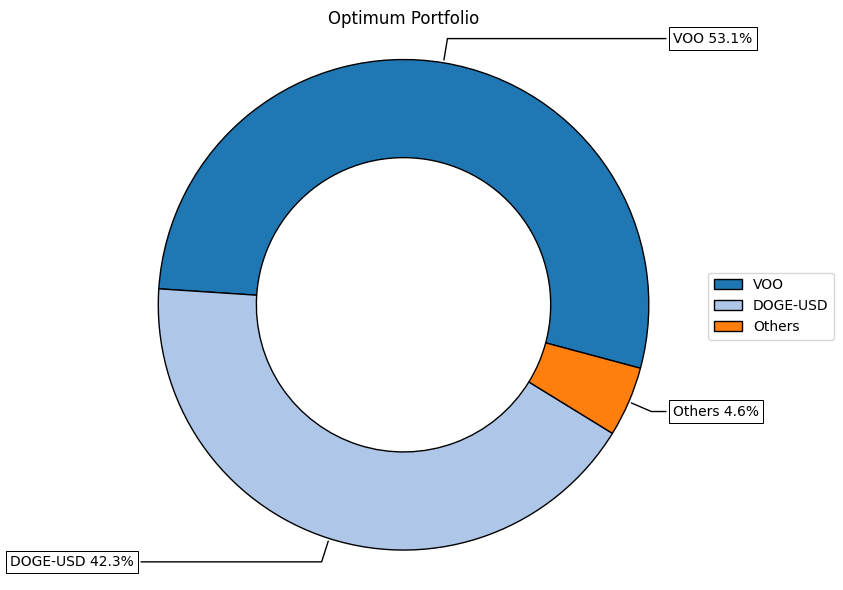

In [11]:
ax = rp.plot_pie(w=w, title = "Optimum Portfolio", others = 0.05, cmap = 'tab20')
plt.show()

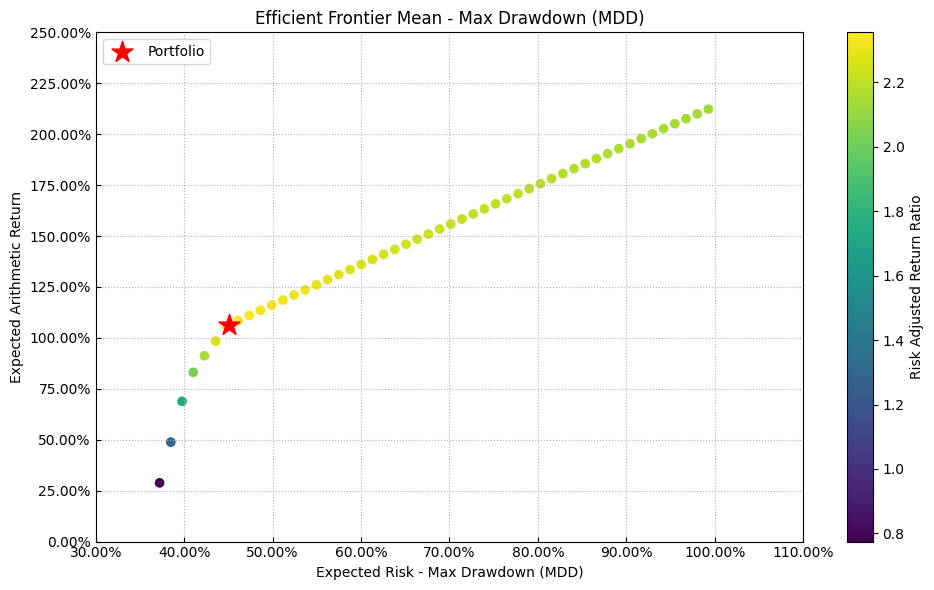

In [12]:
frontier = port.efficient_frontier(model = model, rm=rm, points=50, rf=rf, hist=hist)

ax = rp.plot_frontier(w_frontier=frontier, mu = port.mu, cov=port.cov, returns = returns, rm=rm,
                     rf=rf, cmap='viridis', w=w)
plt.show()

In [28]:
frontier

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
BTC-USD,1.000000e+00,8.925227e-01,8.360633e-01,7.921352e-01,7.548014e-01,7.217024e-01,6.916146e-01,6.638067e-01,6.378012e-01,6.132649e-01,...,1.103186e-01,9.765156e-02,8.509624e-02,7.264825e-02,6.030337e-02,4.805801e-02,3.590834e-02,2.385090e-02,1.188252e-02,6.941373e-10
ETH-USD,1.968103e-08,1.074772e-01,1.639367e-01,2.078648e-01,2.451986e-01,2.782976e-01,3.083854e-01,3.361933e-01,3.621987e-01,3.867351e-01,...,8.896814e-01,9.023484e-01,9.149038e-01,9.273518e-01,9.396966e-01,9.519420e-01,9.640917e-01,9.761491e-01,9.881175e-01,1.000000e+00
LTC-USD,3.277043e-09,2.740982e-08,5.132086e-09,3.512055e-09,1.591953e-09,1.342105e-09,1.146173e-09,4.974844e-08,1.870706e-08,1.879066e-08,...,6.198569e-09,4.347657e-09,2.645966e-09,1.368528e-09,2.402392e-08,1.288453e-08,6.604238e-09,4.898577e-09,4.885525e-10,5.282124e-10


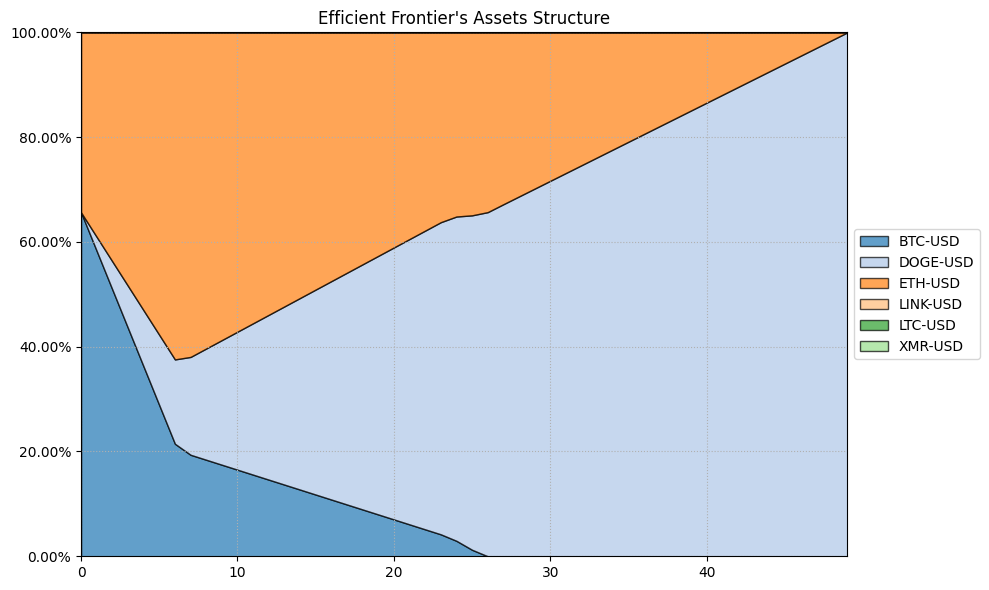

In [73]:
ax = rp.plot_frontier_area(w_frontier = frontier, cmap = "tab20")
plt.show()

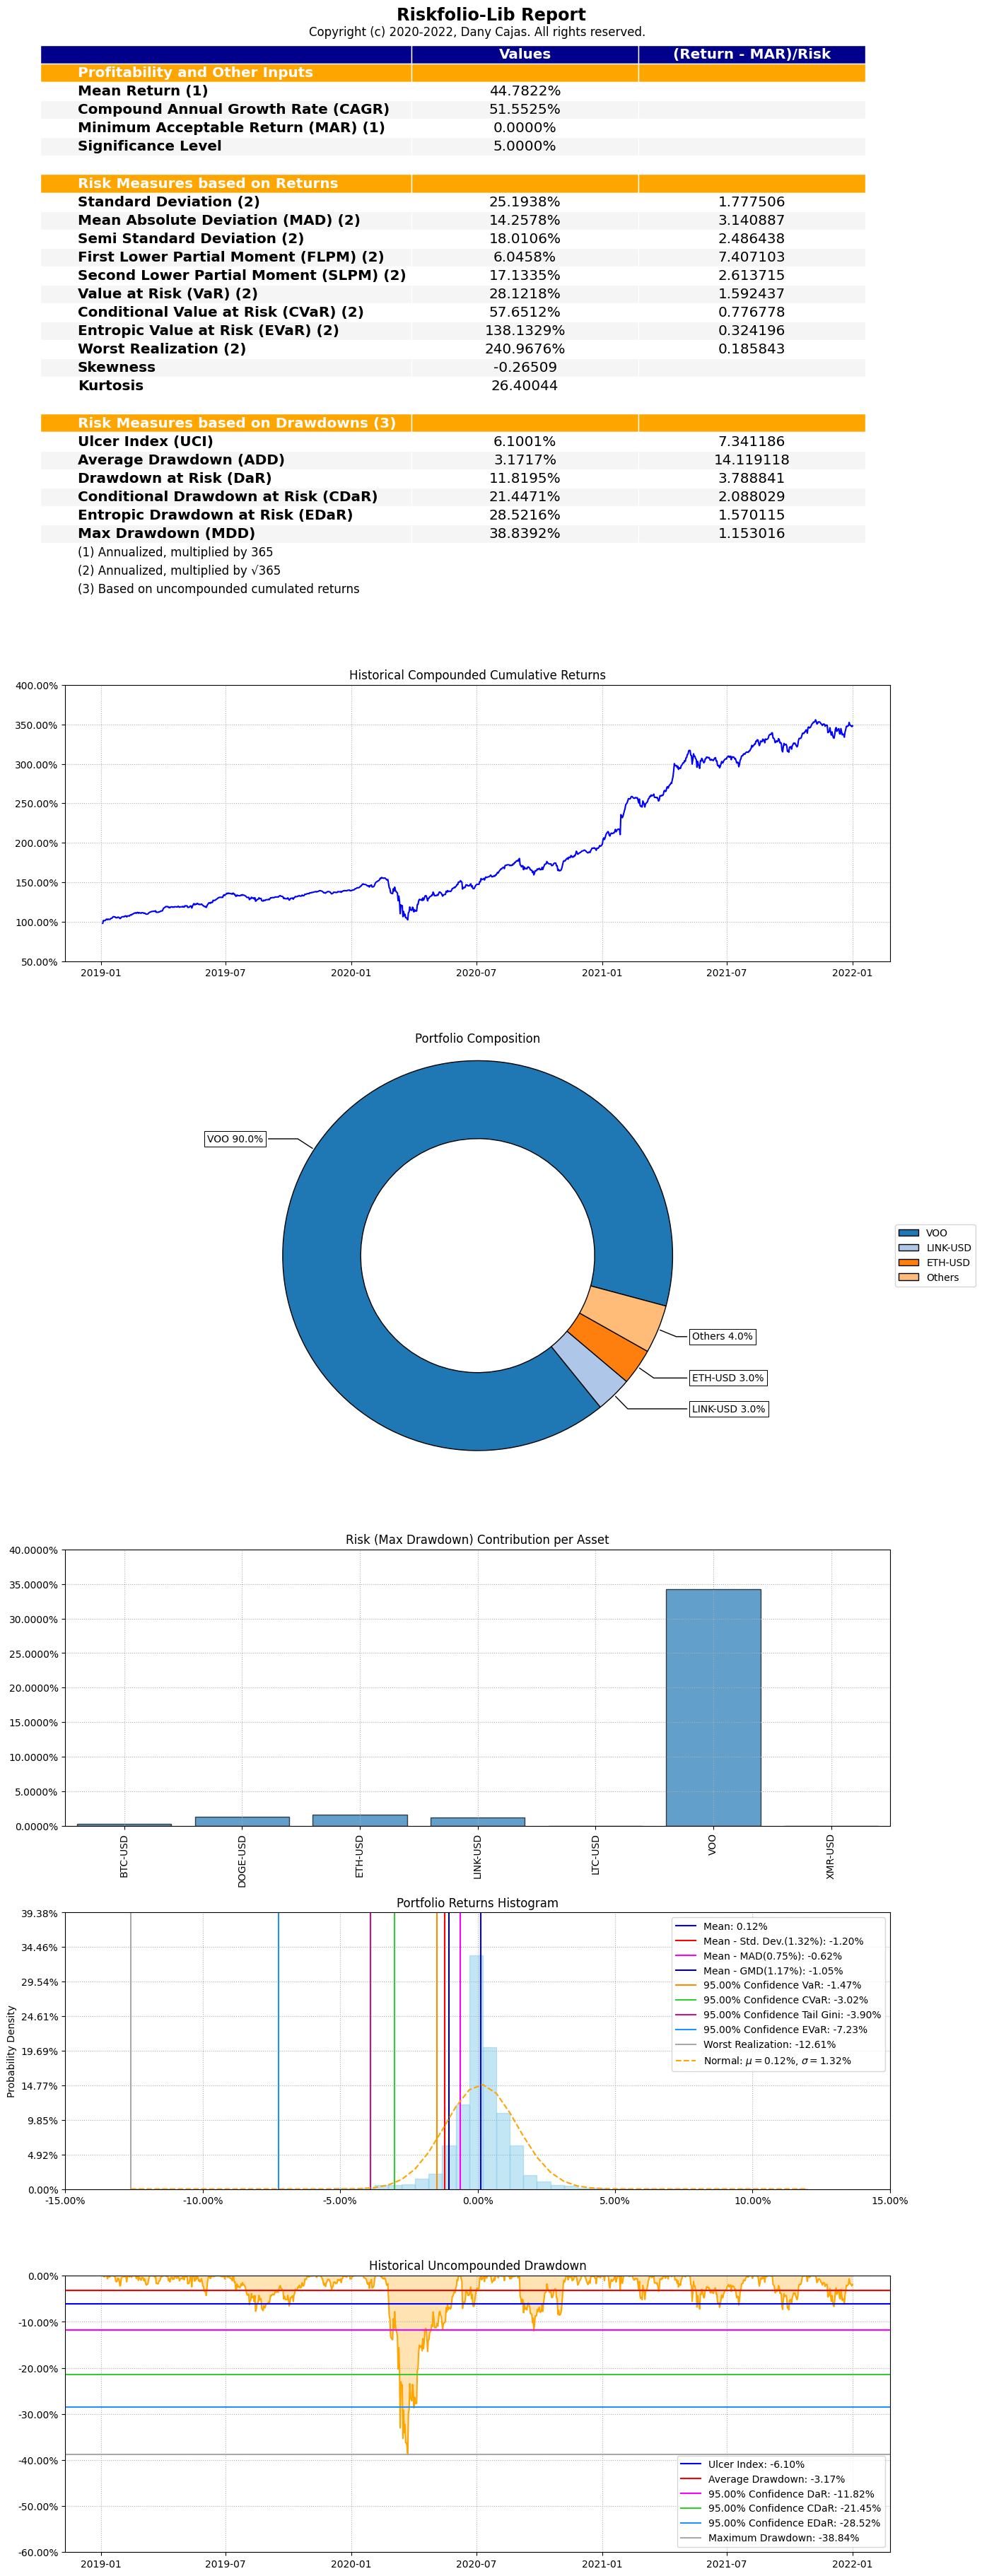

In [119]:
ax = rp.jupyter_report(returns, w, rm=rm, t_factor = 365, days_per_year=365)
plt.show()